# PHYS 309 Assignment 1

### Getting started

<ul>
    <li>If you do not already have the <a href="https://www.anaconda.com/products/distribution">Anaconda <tt>python</tt> distribution</a>, click the link to install the individual, free version</li>
    <li>Download this notebook to your own computer, open with <tt>Jupyter</tt> notebook or lab, and complete the missing code. See the <a href="https://docs.jupyter.org/en/latest/start/index.html"><tt>Jupyter</tt> documentation</a> for help.</li>
</ul>

<strong>Instead of putting in the values of physical constants such as $c$ and $\epsilon_0$ by hand, use SI values pre-programmed into [scipy.constants](https://docs.scipy.org/doc/scipy/reference/constants.html). 
For example, $\mu_0$ is <tt>constants.mu_0</tt>. 

### Set up <tt>python</tt> environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

 # Contains physical constants defined in SI units (default) as well as other systems
from scipy import constants

# Make easily readable plots with large axis labels
plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

### Questions


Recall that the speed of light in vacuum is 
\begin{equation}
c = \frac{1}{\sqrt{\epsilon_0 \mu_0}}, \; \; \; \; \; (1)
\end{equation}
where $\epsilon_0 = 8.85 \times 10^{-12}$ F/m (Farads per meter)$^{*}$ is the electric permittivity of free space and $\mu_0 = 1.26 \times 10^{-6}$ N/A$^2$ (Newtons per Ampere$^2$)$^{**}$ is the magnetic permeability of free space. The electric field created by a point charge $q$ is
\begin{equation}
E = \frac{1}{4 \pi \epsilon_0} \frac{q}{r^2}. \; \; \; \; (2)
\end{equation}
Suppose a charged particle is moving at some fraction of the speed of light in vacuum ($v_q = f c; \; 0 < f < 1$) as seen in reference frame $S$. Reference frame $S^{\prime}$ is co-moving with the point charge, so that $\frac{dx^{\prime}}{dt^{\prime}} = v^{\prime}_q = 0$ in frame $S^{\prime}$. To make the math easier, put $q$ at the origin of $S^{\prime}$.

To understand Einstein's motivation for developing the special theory of relativity, make the <strong>incorrect, erroneous, and wrong</strong> assumption that the Galilean velocity transformation holds true for all values of $f$:
\begin{equation}
\frac{dx^{\prime}}{dt^{\prime}} = \frac{dx}{dt} - v_q \; \; \; (3)
\end{equation}

<ol>
    <li>Assume the charged particle is an electron. Using Equation 2, calculate and plot the electric field as a function of distance $r^{\prime}$ from $q$ in frame $S^{\prime}$. Choose an x-axis range that makes sense to you and label both axes with correct units.</li>
</ol>

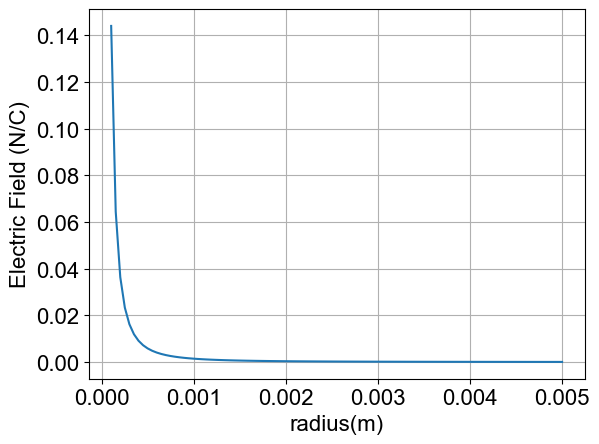

In [2]:
#all test charges used are psoitive to make the graphing more understandable from my POV
K = 1/(4*np.pi*constants.epsilon_0)
r = np.linspace(.0001, .005, num = 100, endpoint = True)
def E (Q, R):
    return K*Q/R**2
plt.plot(r, E(constants.e, r))
plt.grid()
plt.xlabel('radius(m)')
plt.ylabel('Electric Field (N/C)')
plt.show()

<ol start=2>
    <li>The Galilean velocity transformation suggests that objects can "catch up" with light, so that light in a vacuum appears to be going slower than the value of $c$ from Equation (1). Make a plot of $c^{\prime}$, the <strong>incorrect</strong> speed of light in frame $S^{\prime}$ according to the Galilean transformation, as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

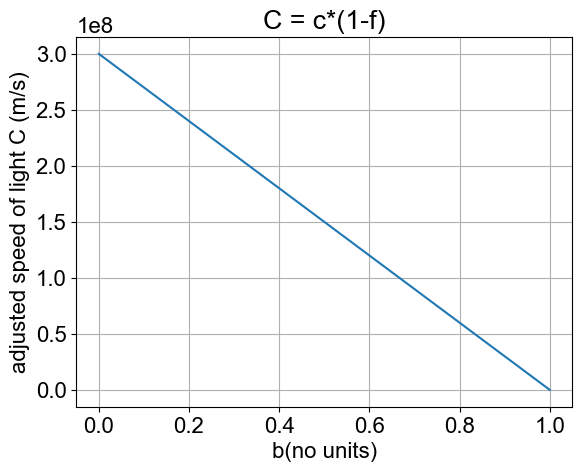

In [3]:
b = np.linspace(0, 1, 100, endpoint = True)
def C (f):
    return constants.c * (1-f)
plt.plot(b, C(b))
plt.grid()
plt.xlabel('b(no units)')
plt.ylabel('adjusted speed of light C (m/s)')
plt.title("C = c*(1-f)")
plt.show()


<ol start=3>
    <li>In frame $S^{\prime}$, something has to give: either Equation (1) is no longer true, or the values of $\epsilon_0$ and/or $\mu_0$ have to change. Suppose Equation (1) is still true and $\mu_0 = \mu_0^{\prime}$. Make a plot with two vertically stacked subplots. The top subplot should show $\epsilon_0^{\prime}$ as a function of $f$, while the bottom plot should show the electric field $E^{\prime} = \frac{1}{4 \pi \epsilon_0^{\prime}} \frac{q}{{r^{\prime}}^2}$ at $r^{\prime} = 1 \mu \mathrm{m} = 10^{-6}$ m as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

C:\Users\wilky\AppData\Local\Temp\ipykernel_36472\3079211656.py:5: RuntimeWarning: divide by zero encountered in divide
  return 1/(constants.mu_0 * C**2)


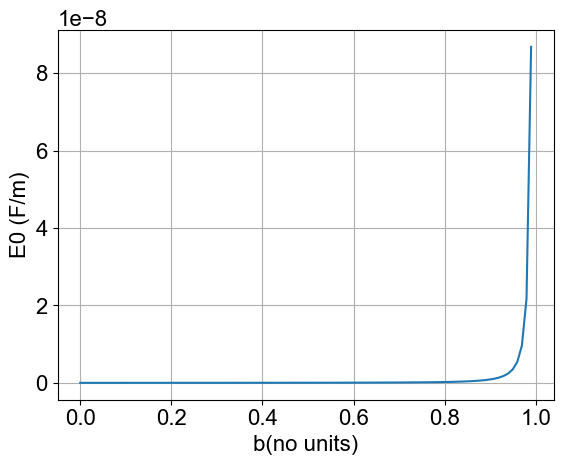

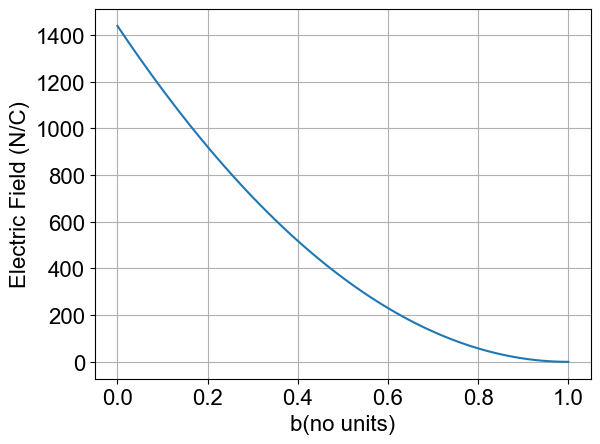

In [4]:
## I have no clue if there is a better way to do to do the stacked plots than this, i would love to know
## if there is a better way and i can certainly resubmit quickly after class if there is.
MiM = 1*10**-6
def E0(C):
    return 1/(constants.mu_0 * C**2)
E_0 = E0(C(b))
Ef= constants.e/(4*np.pi*E_0*(MiM**2))
plt.plot(b, E_0)
plt.grid()
plt.xlabel('b(no units)')
plt.ylabel('E0 (F/m)')
plt.show()
plt.plot(b, Ef)
plt.grid()
plt.xlabel('b(no units)')
plt.ylabel('Electric Field (N/C)')
plt.show()

<ol start=4>
    <li>Now assume $f = 0.5$. In the same plot window, plot $E^{\prime}(r^{\prime})$ given by Equation 2 (same curve as in Problem 1) <em>and</em> $E^{\prime}(r^{\prime})$ calculated as in Problem 3, where $\epsilon_0^{\prime}$ is a function of $f$. Do you notice a problem?</li>
</ol>

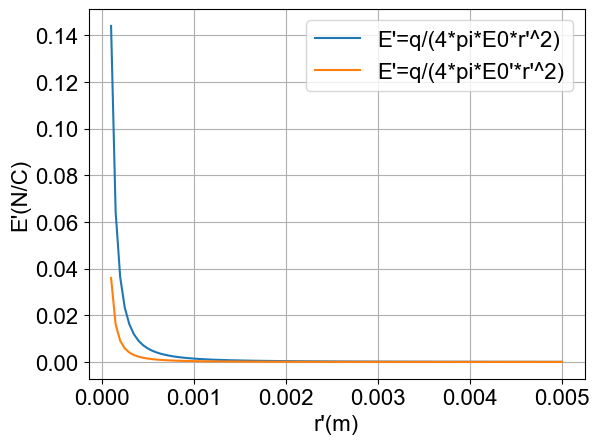

In [5]:
E_0New = E0(C(.5))
EfNew = constants.e/(4*np.pi*E_0New*(r**2))
plt.plot(r, E(constants.e, r), label = "E'=q/(4*pi*E0*r'^2)")
plt.plot(r, EfNew, label = "E'=q/(4*pi*E0'*r'^2)")
plt.xlabel("r'(m)")
plt.ylabel("E'(N/C)")
plt.legend()
plt.grid()
plt.show()

As the two curves do not match, this means that E&M will break down if we allow for gallelean transformations to be used in this context. This means that the constants epsilon0 does not vary. 

<ol start=5>
    <li>To resolve the issues revealed by the plot from Problem 4, you may suggest setting $\epsilon_0^{\prime} = \epsilon_0$ and allowing $\mu_0^{\prime}$ to vary with $f$. Let's explore that solution. To accompany the point charge in problems 1-4, add a current loop that's also at rest in frame $S^{\prime}$. Recall that the magnitude of the magnetic field strength at the center of the loop in frame $S$ is $B = \frac{\mu_0 I}{2R}$, where $I$ is the current and $R$ is the radius of the loop. Suppose $I = 1$ A and $R = 1$ m. Assume $E^{\prime} = E$, $B^{\prime} = B$, and $c^{\prime}$ depends on $f$ as in problem 2. Plot $\mu_0$ as a function of $f$.</li>
</ol>

C:\Users\wilky\AppData\Local\Temp\ipykernel_36472\3309928907.py:1: RuntimeWarning: divide by zero encountered in divide
  Mu0New = 1/(constants.epsilon_0 * C(b)**2)


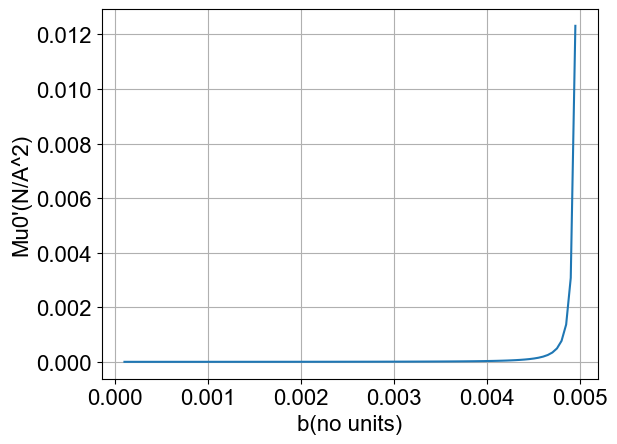

In [6]:
Mu0New = 1/(constants.epsilon_0 * C(b)**2)
plt.plot(r, Mu0New)
plt.xlabel("b(no units)")
plt.ylabel("Mu0'(N/A^2)")
plt.grid()
plt.show()

<ol start=6>
<li>If we calculate $c^{\prime}$ using the Galilean transformation in Equation 3, is there any value of $f$ for which $E^{\prime} = E$ <strong>and</strong> $B^{\prime} = B$? Make a graph to illustrate your answer.</li>
</ol>

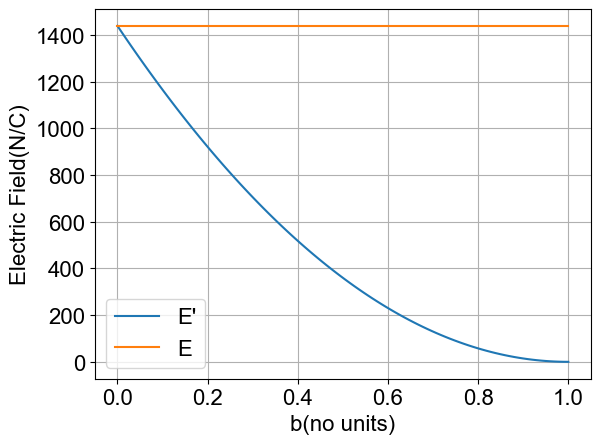

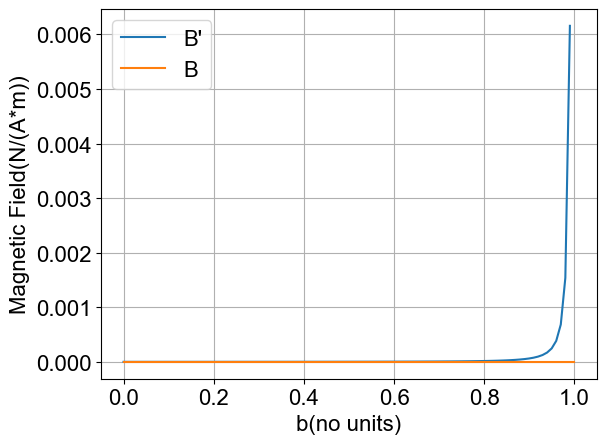

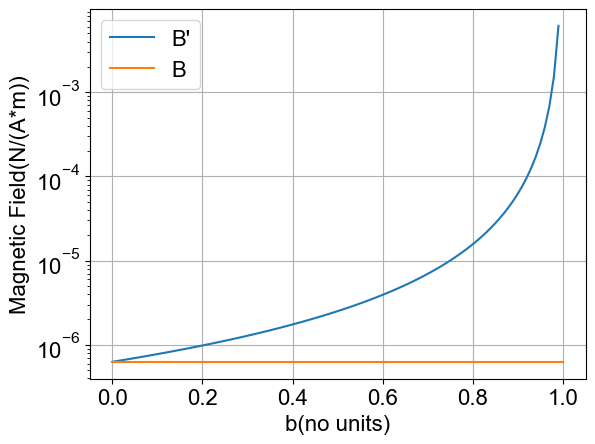

In [7]:
Egood = constants.e / (4*np.pi*constants.epsilon_0*MiM**2)
Bgood = (constants.mu_0*1)/(1*2)
BNew = Mu0New/2
plt.plot(b, Ef, label = "E'")
plt.plot(b, Egood*np.ones(len(b)), label = "E")
plt.xlabel("b(no units)")
plt.ylabel("Electric Field(N/C)")
plt.legend()
plt.grid()
plt.show()

plt.plot(b, BNew, label = "B'")
plt.plot(b, Bgood*np.ones(len(b)), label = "B")
plt.xlabel("b(no units)")
plt.ylabel("Magnetic Field(N/(A*m))")
plt.legend()
plt.grid()
plt.show()

plt.semilogy(b, BNew, label = "B'")
plt.semilogy(b, Bgood*np.ones(len(b)), label = "B")
plt.xlabel("b(no units)")
plt.ylabel("Magnetic Field(N/(A*m))")
plt.legend()
plt.grid()
plt.show()

both E and B are only equal to E' and B' respectively when b = 0 as shown by plots 1 and 3
Plot 2 is added because i only realized that plot 3 would be necessary after seeing how plot 2 turned out and the relatively low distinction present in plot 2